In [1]:
import matplotlib.pyplot as plt

from src.main_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\jupyter'

# Load data

In [5]:
# load sample data (roi by time frame)
# note: if using suite2p, use all ROIs by loading F.npy file for channel1 and F_chan2.npy for channel2
raw = np.load('C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\data\\F.npy')
raw.shape

(1000, 7500)

In [31]:
data = smooth_data(raw)

Text(0.5, 1.0, 'example cell raw')

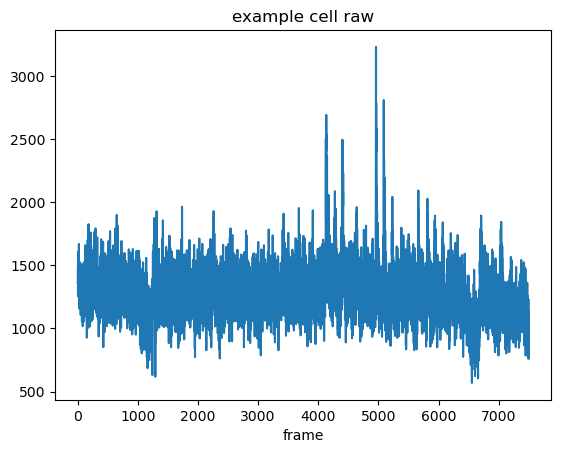

In [16]:
plt.plot(raw[371, :])
plt.xlabel('frame')
plt.title('example cell raw')

Text(0.5, 1.0, 'example cell smoothed')

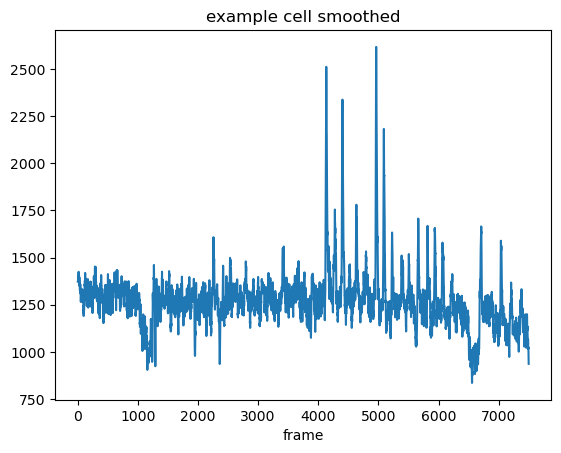

In [17]:
plt.plot(data[371, :])
plt.xlabel('frame')
plt.title('example cell smoothed')

# ROI selection

In [7]:
roi = SelectROI()

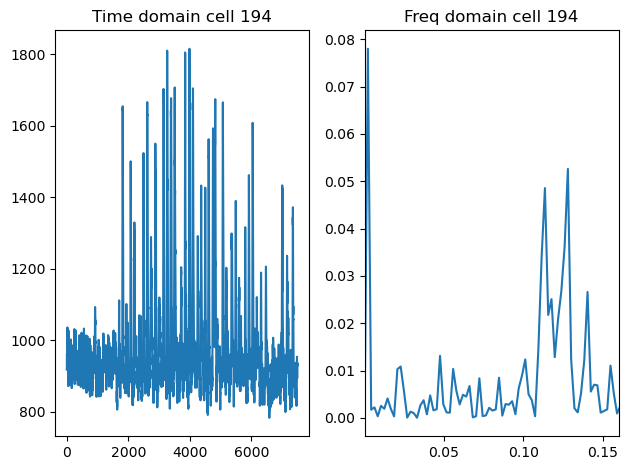

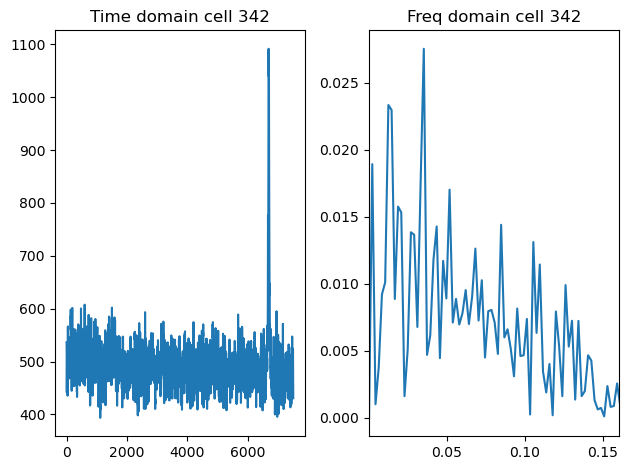

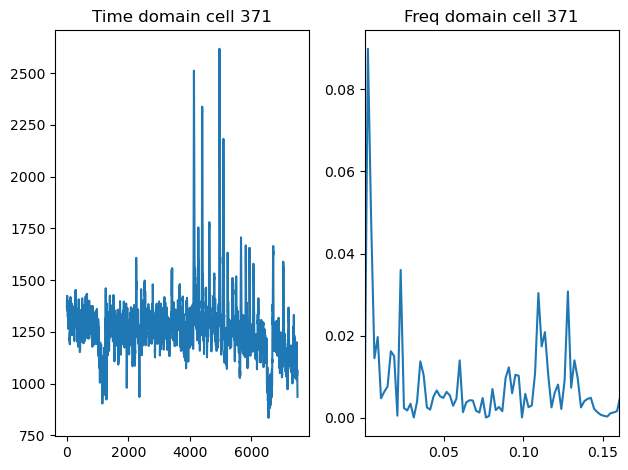

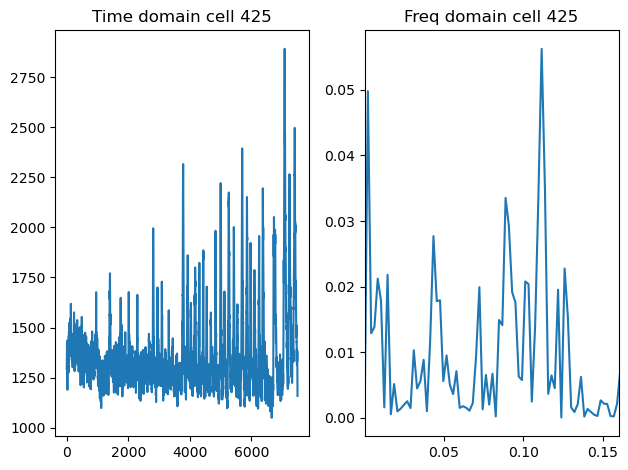

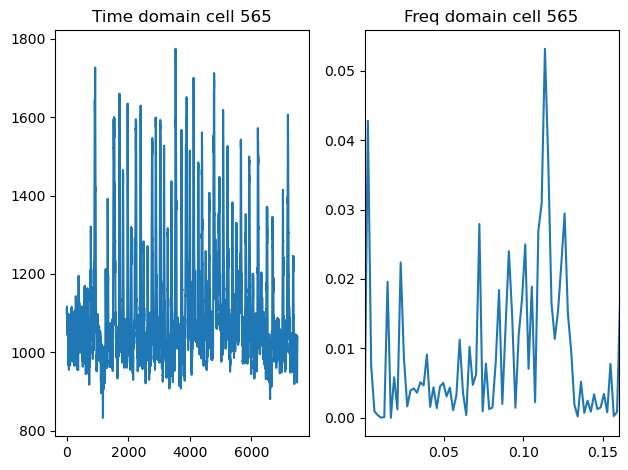

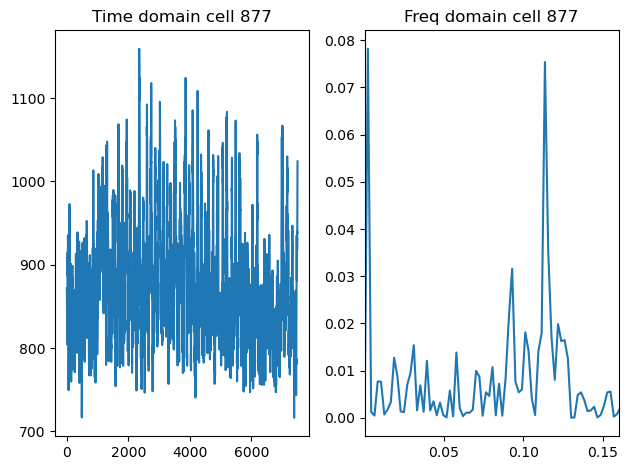

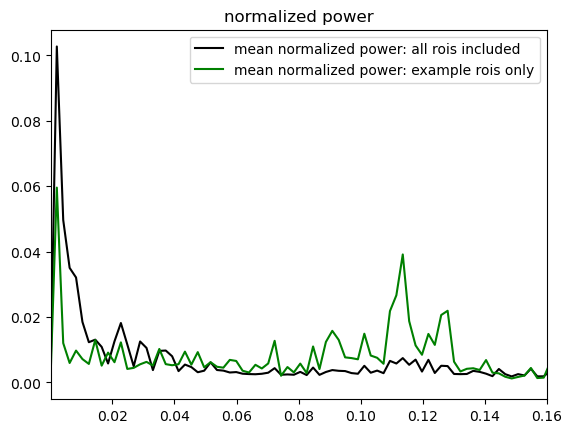

In [8]:
roi.plot_norm_power(data, [194, 342,371, 425, 565, 877])

In [14]:
# adjust freq bands selection criterion by looking at freq bands that have the biggest difference between green (good rois) and black (average noisy rois)
roi.transients_high=0.13
roi.transients_low=0.08

Transients high set to: 0.13 Hz
Transients low set to: 0.08 Hz


134 rois selected using power > 0.15


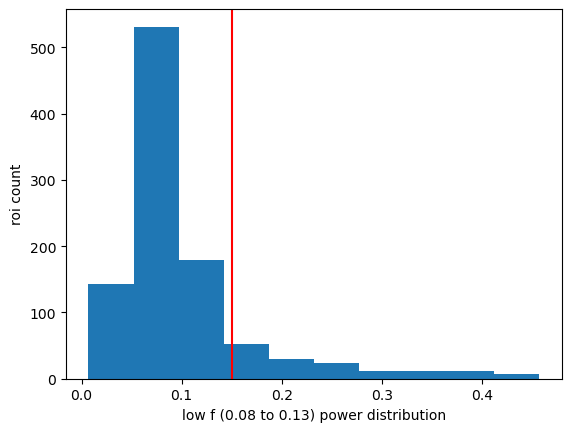

array([558, 417, 194, 565, 530, 877, 745, 431, 567, 918, 444, 344, 394,
       685, 226, 264, 689, 345, 648, 704, 542, 896, 829, 946, 470,  97,
       489, 813, 456, 410, 925, 631, 571, 789, 676, 320, 599, 167, 508,
       328, 382, 486, 659, 693, 398, 839, 931, 966, 854, 118, 548, 791,
       698, 912, 428, 528, 113, 158, 691,  88, 284, 749, 257, 589, 956,
       680, 933, 842, 146, 907, 295, 985, 238, 223, 425, 721,  11, 525,
       820, 170, 910,  80,  75, 497,  38, 552, 988, 147, 422, 270, 321,
       732, 619, 635, 670, 393, 819, 651, 534, 858, 942, 389, 821, 203,
       412, 972, 584, 744, 371, 175,  66, 448, 967, 155, 482, 687, 578,
       722, 772, 855, 532, 471, 191, 103, 386, 182, 780, 485, 355, 481,
       954, 752,  78,  55], dtype=int64)

In [15]:
roi.rank_rois(data)

In [16]:
# move ratio lower to include more rois. lower thresh: more rois more false positives; higher thresh: less rois more false negatives
roi.norm_power_thresh=0.15

Norm power threshold set to 0.15


134 rois selected using power > 0.15


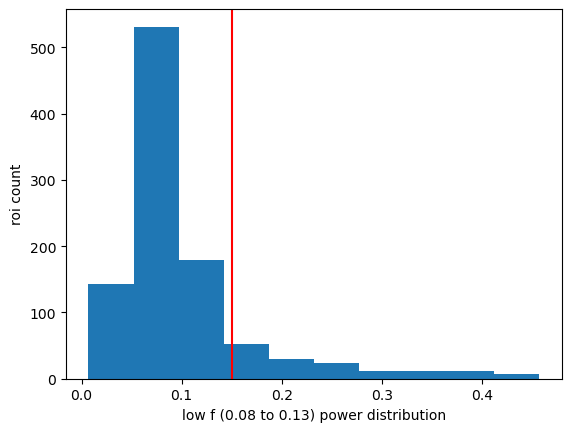

In [17]:
# rerun to include more rois. output rois are ranked in order
rois = roi.rank_rois(data)

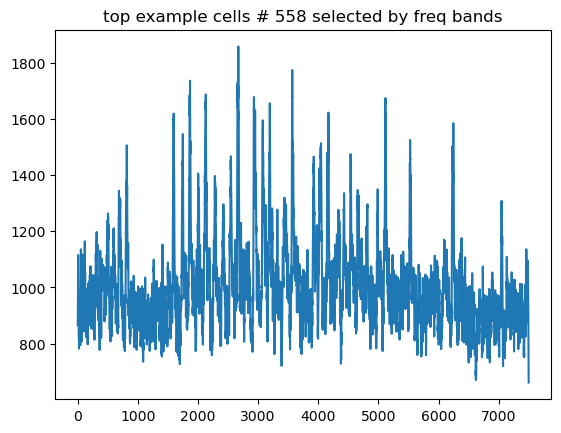

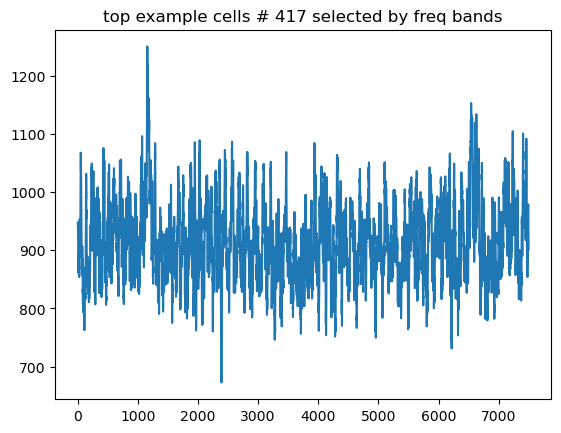

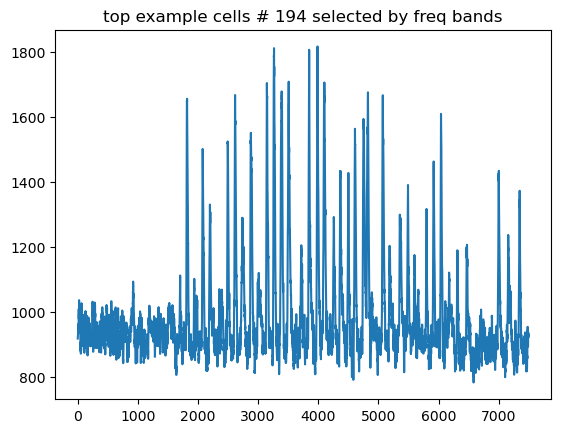

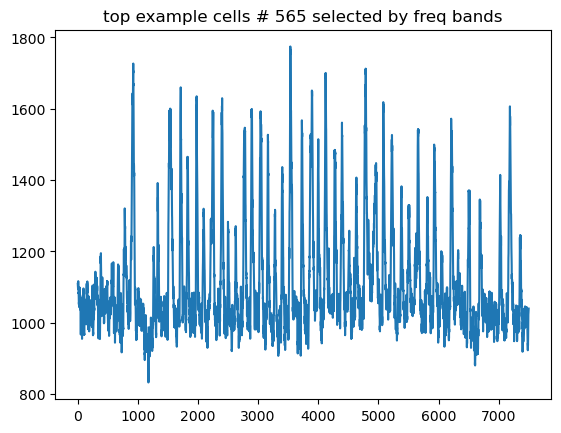

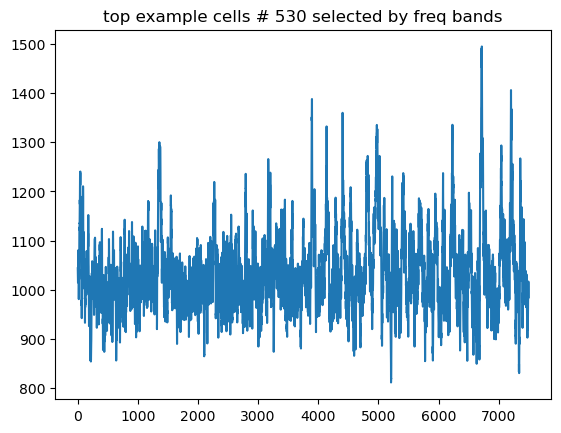

In [18]:
for n in range(5):
    plt.plot(data[rois[n], :])
    plt.title(f'top example cells # {rois[n]} selected by freq bands')
    plt.show()

# Motion detection

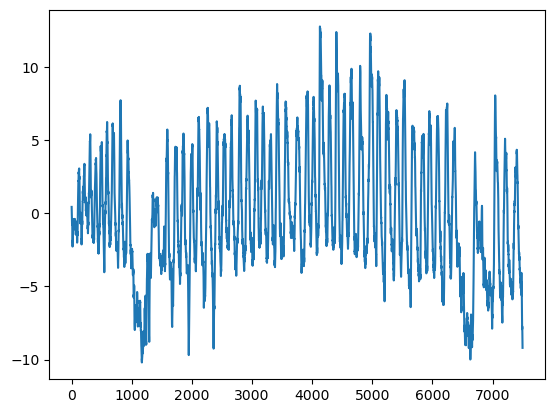

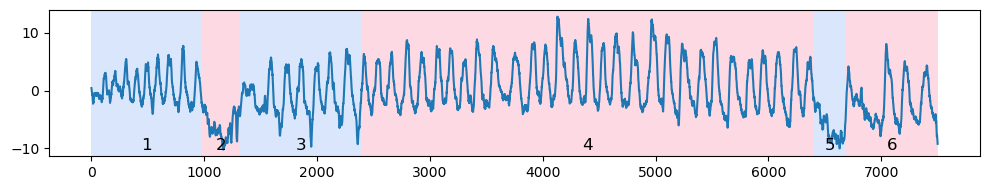

Finished. Now data in shape: (134, 7500)


In [32]:
data = detect_motion(data, rois)

In [37]:
deleted_frames = np.sum(np.isnan(data).any(axis=0))
print(f'deleted {deleted_frames} frames in total')

deleted 630 frames in total


In [38]:
combined, selected_rois = handle_nan_frames(data, rois)

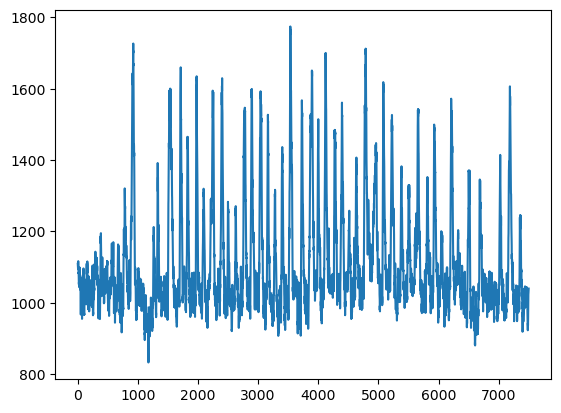

In [25]:
plt.plot(data[3, :])

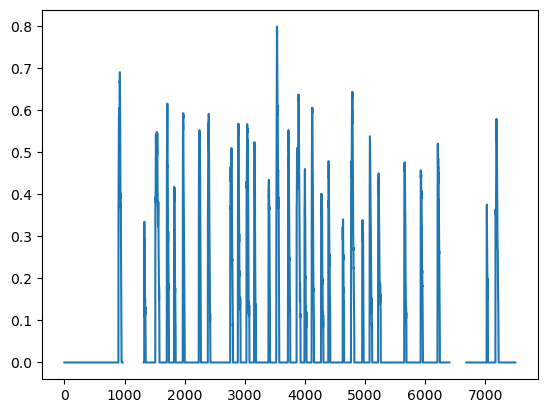

In [42]:
plt.plot(combined[3, :])


# Axon Grouping: to be added soon